#### Answers submitted by:  Aaron Wiegel
#### Date:  06-20-17
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [3]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [4]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.1
Numpy version: 1.12.1


In [5]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [6]:
# read csv data into pandas dataframe
olives = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [7]:
olives.shape

(572, 11)

## Q6:  Print the first 4 rows of the data

In [8]:
olives.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [9]:
olives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
Unnamed: 0     572 non-null object
region         572 non-null int64
area           572 non-null int64
palmitic       572 non-null int64
palmitoleic    572 non-null int64
stearic        572 non-null int64
oleic          572 non-null int64
linoleic       572 non-null int64
linolenic      572 non-null int64
arachidic      572 non-null int64
eicosenoic     572 non-null int64
dtypes: int64(10), object(1)
memory usage: 49.2+ KB


## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [10]:
olives['sub_region_raw'] = olives['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [11]:
olives = olives.rename(columns={'Unnamed: 0' : 'sub_region_desc'})

## Q10:  Rename the column 'area' to:  'sub_region'

In [12]:
 olives = olives.rename(columns={'area' : 'sub_region'})

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [13]:
len(olives['region'].unique())

3

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [14]:
 len(olives['sub_region'].unique())

9

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [15]:
 len(olives['sub_region_desc'].unique())

572

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [16]:
olives['sub_region_desc'] = olives['sub_region_desc'].str.replace('.\.|[1-9]|[10-99]', '')

In [17]:
olives.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


In [18]:
#df.head()

In [19]:
#df.head()

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [20]:
 len(olives['sub_region_desc'].unique())

9

## Q16:   Create a horizontal frequency barplot for 'region'

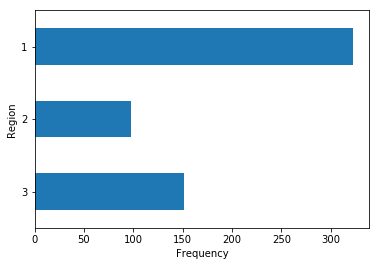

In [21]:
fig, ax = plt.subplots()

ax.set_xlabel('Frequency')
ax.set_ylabel('Region')
olives['region'].value_counts().sort_index(ascending=False).plot('barh', ax=ax)

## Q17:   Create a horizontal frequency barplot for 'sub_region'

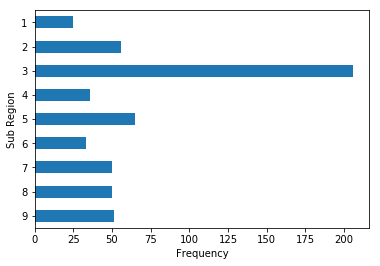

In [22]:
fig, ax = plt.subplots()

ax.set_xlabel('Frequency')
ax.set_ylabel('Sub Region')

olives['sub_region'].value_counts().sort_index(ascending=False).plot('barh', ax = ax)


## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

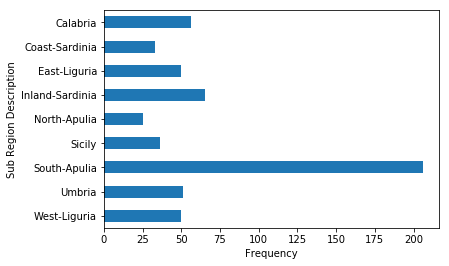

In [23]:
fig, ax = plt.subplots()

ax.set_xlabel('Frequency')
ax.set_ylabel('Sub Region Description')

olives['sub_region_desc'].value_counts().sort_index(ascending=False).plot('barh')